<a href="https://colab.research.google.com/github/vitorquintella/personal-ml-study/blob/main/Caderno_Interpreta%C3%A7%C3%A3o_dos_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo
Disclaimer: Baseado nas aulas do Let's Code

# Ambientação
Não basta dar um bom desempenho, é necessário checar com o negócio se faz sentido incluir esses features. Lembrando que features a mais, eventualmente apenas agregam ruido.

A dificuldade é quando o negócio não consegue confirmar a importância da variável de um modo geral. Aí então buscamos se não é influência de um cenário específico.

Quando não temos certeza imediata da importância de um feture, podemos verificar se embora não seja intuitivamente importante sozinho, se em um cenário de uma combinação específico de features que o modelo  Onde levamos alguns cenários específicos 


# Para se aprofundar
- [Serie completa de artigos explicando a utilização](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

- [Documentação oficial](https://shap-lrjball.readthedocs.io/en/latest/index.html)

- [Curso do Kaggle com certificação](https://www.kaggle.com/learn/machine-learning-explainability) 


# Prática

In [ ]:
# Incompativilidade do shap - 1.20.0 é o recomendado pelo shap
!pip install numpy==1.21.5 -qqq 
!pip install shap -qqq

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
%%capture output
from sklearn.datasets import load_boston
# TODO: The Boston housing prices dataset has an ethical problem. Change to California dataset.
boston_dataset = load_boston() 
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV']=boston_dataset.target

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Supondo que no EDA e na modelagem escolhemos e identificamos estas
melhores_features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
X = df[melhores_features]
y = df['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_std = StandardScaler().fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_std, columns=melhores_features)
X_test_std = StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

r2_score(y_test, y_pred)

X does not have valid feature names, but LinearRegression was fitted with feature names


0.6110628705946919

In [ ]:
model.coef_

array([-0.99482147,  0.45333612,  0.77301357, -2.26829571,  3.20884421,
       -2.9207955 ,  0.95374587, -2.13350127,  1.15704513, -3.64561121])

Olhando para o modelo, como você explica para alguém de negócio como ele funciona?  

## Shap
SHAP (SHapley Additive exPlanations) é uma abordagem da teoria dos jogos para explicar a saída de qualquer modelo de aprendizado de máquina.  
https://shap-lrjball.readthedocs.io/en/latest/examples.html#plots

In [ ]:
import shap

In [ ]:
observacao = 18
X_train_std.iloc[observacao]

CRIM      -0.383915
ZN         0.451080
CHAS      -0.278089
NOX       -1.067417
RM        -1.020207
DIS        1.948102
RAD       -0.274672
PTRATIO    0.351170
B          0.177267
LSTAT      0.006006
Name: 18, dtype: float64

In [ ]:
explicador = shap.LinearExplainer(model, X_train_std)

In [ ]:
shap_values = explicador(X_train_std)

#### watterfall
Cascata: Quanto cada um das features contribuiu para y ou f(x), vide predict abaixo.
  
$E[f(X)]$
É a média de valor predito para os 

In [ ]:
model.predict([X_train_std.iloc[observacao]])

X does not have valid feature names, but LinearRegression was fitted with feature names


array([15.79753503])

In [ ]:
explicador.expected_value

22.656068540678916

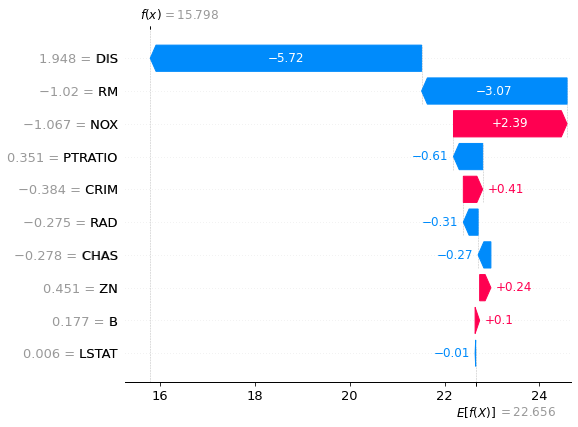

In [ ]:
shap.plots.waterfall(shap_values[observacao])

#### Force Plot
É muito parecido com o watterfall

In [ ]:
shap.initjs()
shap.plots.force(shap_values[observacao])

Para entender não somente para uma observacão específica podemos olhar de uma forma mais geral.

In [ ]:
shap.initjs()
shap.force_plot(explicador.expected_value, shap_values.data, X_train_std)

#### Summary Plot

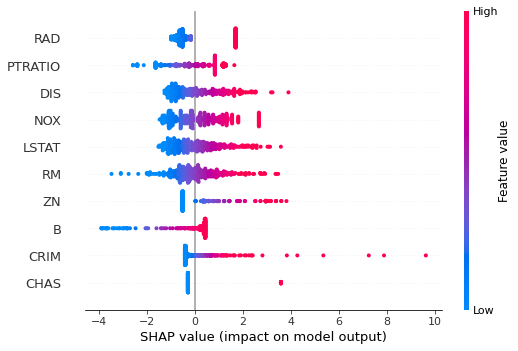

In [ ]:
shap.summary_plot(shap_values.data, X_train_std)